<a href="https://colab.research.google.com/github/Chercas/ML_2021/blob/main/Wide%26DeepNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = fetch_california_housing()

In [48]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)


In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit_transform(X_train)
scaler.transform(X_valid)
scaler.transform(X_test)

array([[ 2.05119389,  0.4234919 ,  0.21375962, ..., -0.06285689,
        -0.70592019,  0.55361638],
       [-0.62519119,  0.58271536, -0.12282289, ...,  0.02273931,
         1.29748701, -1.578823  ],
       [ 1.61864027,  0.58271536,  0.58738095, ..., -0.03209089,
        -0.67790051,  0.73298044],
       ...,
       [ 0.02072679,  0.34388017, -0.13748312, ..., -0.0074003 ,
         0.97059073, -1.40942361],
       [ 0.16133368,  0.10504497, -0.01522543, ..., -0.11789879,
         1.52631441, -1.52899965],
       [-0.82102687,  0.82155056, -0.60108285, ...,  0.0840803 ,
        -0.82733881,  1.00202653]])

In [22]:
model_1 = keras.models.Sequential([
                          keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
                          keras.layers.Dense(1)
                          ])

In [23]:
model_1.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
history = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 171592.9299 - val_loss: 38.5934
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 27.7202 - val_loss: 7.1628
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 5.6643 - val_loss: 2.0301
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 1.9231 - val_loss: 1.5311
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 1.5031 - val_loss: 1.8692
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 1.2761 - val_loss: 0.9889
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 1.0362 - val_loss: 0.9068
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.9975 - val_loss: 1.1163
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.9523 - val_loss: 1.4791
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.9677 - val_loss:

In [25]:
mse_model_1_test = model_1.evaluate(X_test, y_test)

162/162 [==============================] - 0s 759us/step - loss: 0.7577


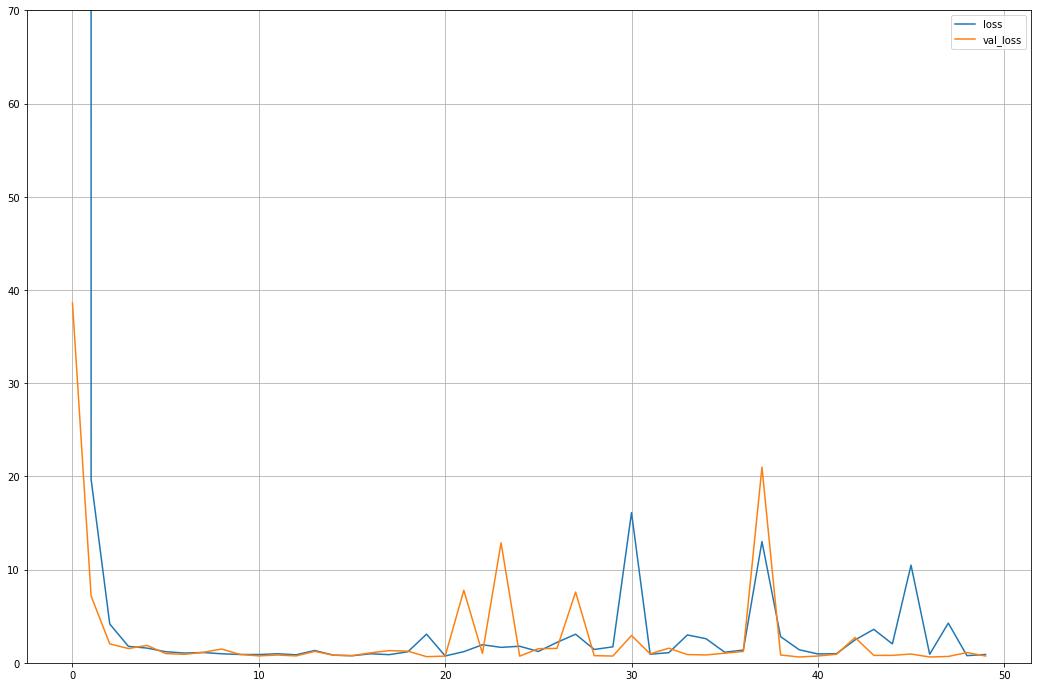

In [26]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 70) # set the vertical range to [0-1]
plt.show()

In [52]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model_2 = keras.models.Model(inputs=[input], outputs=[output])

In [53]:
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 33227.0175 - val_loss: 3.1807
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 14.6670 - val_loss: 4.3968
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 13.0328 - val_loss: 1.1537
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 4.1313 - val_loss: 1.1456
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 2.4712 - val_loss: 0.9976
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 5.5651 - val_loss: 0.9265
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9648 - val_loss: 0.8400
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0631 - val_loss: 0.9174
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0348 - val_loss: 0.7786
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 1.0751 - val_loss: 

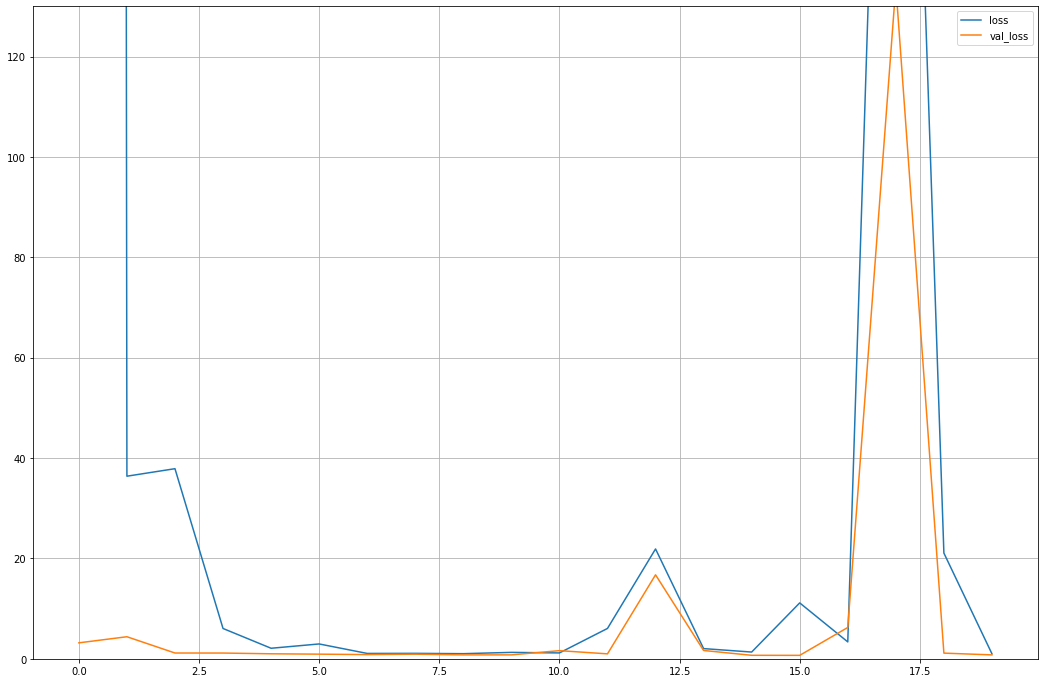

In [55]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 130) # set the vertical range to [0-1]
plt.show()

In [56]:
mse_model_2_test = model_2.evaluate(X_test, y_test)

162/162 [==============================] - 0s 788us/step - loss: 0.7752


In [58]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1)(concat)

In [60]:
model_3 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [62]:
model_3.compile(loss='mse', optimizer='adam')

In [64]:
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [65]:
history_3 = model_3.fit((X_train_A, X_train_B), y_train, epochs=25, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/25
363/363 [==============================] - 1s 1ms/step - loss: 24297.1238 - val_loss: 770.7271
Epoch 2/25
363/363 [==============================] - 0s 1ms/step - loss: 643.5314 - val_loss: 266.9952
Epoch 3/25
363/363 [==============================] - 0s 1ms/step - loss: 211.7824 - val_loss: 105.0379
Epoch 4/25
363/363 [==============================] - 0s 1ms/step - loss: 97.6410 - val_loss: 72.1292
Epoch 5/25
363/363 [==============================] - 0s 1ms/step - loss: 78.2522 - val_loss: 72.5359
Epoch 6/25
363/363 [==============================] - 0s 1ms/step - loss: 65.2736 - val_loss: 51.1983
Epoch 7/25
363/363 [==============================] - 0s 1ms/step - loss: 52.6023 - val_loss: 41.0179
Epoch 8/25
363/363 [==============================] - 0s 1ms/step - loss: 41.7811 - val_loss: 32.7168
Epoch 9/25
363/363 [==============================] - 0s 1ms/step - loss: 33.6417 - val_loss: 24.1761
Epoch 10/25
363/363 [==============================] - 0s 1ms/step - loss:

In [67]:
mse_model_3_test = model_3.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 764us/step - loss: 1.4368


In [68]:
y_pred = model_3.predict((X_new_A, X_new_B))

In [69]:
y_pred

array([[3.06734  ],
       [2.0451384],
       [2.807364 ]], dtype=float32)